# World Ocean Atlas 18 
## 1 Degree

# Start coding here!

## All urls 
https://www.ncei.noaa.gov/thredds-ocean/fileServer/ncei/woa/temperature/decav/1.00/woa18_decav_t01_01.nc
https://www.ncei.noaa.gov/thredds-ocean/fileServer/ncei/woa/salinity/decav/1.00/woa18_decav_s01_01.nc
https://www.ncei.noaa.gov/thredds-ocean/fileServer/ncei/woa/density/decav/1.00/woa18_decav_I01_01.nc

https://www.ncei.noaa.gov/thredds-ocean/fileServer/ncei/woa/oxygen/all/1.00/woa18_all_o01_01.nc
https://www.ncei.noaa.gov/thredds-ocean/fileServer/ncei/woa/AOU/all/1.00/woa18_all_A01_01.nc
https://www.ncei.noaa.gov/thredds-ocean/fileServer/ncei/woa/silicate/all/1.00/woa18_all_i01_01.nc
https://www.ncei.noaa.gov/thredds-ocean/fileServer/ncei/woa/phosphate/all/1.00/woa18_all_p01_01.nc
https://www.ncei.noaa.gov/thredds-ocean/fileServer/ncei/woa/nitrate/all/1.00/woa18_all_n01_01.nc

https://www.ncei.noaa.gov/data/oceans/woa/WOA18/DATA/mld/netcdf/decav81B0/1.00/woa18_decav81B0_M0201_01.nc
https://www.ncei.noaa.gov/data/ocean/woa/WOA18/DATA/mld/netcdf/decav81B0/1.00/woa18_decav81B0_M0201_01.nc

In [1]:
# Here it is important that the function argument name "time" match
# the name of the  dataset dimension "time"

def format_function(variable, time):
    
    if (variable == 'temperature') or (variable == 'salinity'):
        fname =("https://www.ncei.noaa.gov/thredds-ocean/fileServer/ncei/woa/"
            f"{variable}/decav/1.00/woa18_decav_{variable[0]}{time:02d}_01.nc")
    elif variable == 'density':
        fname = ("https://www.ncei.noaa.gov/thredds-ocean/fileServer/ncei/woa/"
            f"{variable}/decav/1.00/woa18_decav_I{time:02d}_01.nc")
    elif variable == 'oxygen' or variable == 'AOU' or variable == 'phosphate' or variable == 'nitrate':
        fname = ("https://www.ncei.noaa.gov/thredds-ocean/fileServer/ncei/woa/"
            f"{variable}/all/1.00/woa18_all_{variable[0]}{time:02d}_01.nc")
    elif variable == 'silicate':
        fname = ("https://www.ncei.noaa.gov/thredds-ocean/fileServer/ncei/woa/"
            f"{variable}/all/1.00/woa18_all_i{time:02d}_01.nc")
    elif variable == 'mld':
        fname = ("https://www.ncei.noaa.gov/data/oceans/woa/WOA18/DATA/"
            f"{variable}/netcdf/decav81B0/1.00/woa18_decav81B0_M02{time:02d}_01.nc")

            
    return fname

In [2]:
from pangeo_forge_recipes import patterns

variable_merge_dim = patterns.MergeDim("variable", keys=["temperature", 
                                                         "salinity",
                                                         "density",
                                                         "oxygen", 
                                                         "AOU", 
                                                         "phosphate", 
                                                         "nitrate", 
                                                         "silicate", 
                                                         "mld"
                                                        ])

# Here it is important that the ConcatDim name "time" match the name of the 
# dataset dimension "time" (and the argument name in format_function)
month_concat_dim = patterns.ConcatDim("time", keys=list(range(1, 3)), nitems_per_file=1)

pattern = patterns.FilePattern(format_function, variable_merge_dim, month_concat_dim)
pattern

<FilePattern {'variable': 9, 'time': 2}>

In [3]:
def fix_encoding_and_attrs(ds, fname):
    ds.time.attrs['calendar'] = '360_day'
    ds = xr.decode_cf(ds)
    ds = ds.set_coords(['crs', 'lat_bnds', 'lon_bnds', 'depth_bnds', 'climatology_bounds'])
    return ds

In [4]:
from pangeo_forge_recipes.recipes import XarrayZarrRecipe

recipe = XarrayZarrRecipe(
    pattern,
    xarray_open_kwargs={'decode_times': False},
    process_input=fix_encoding_and_attrs
)
recipe

XarrayZarrRecipe(file_pattern=<FilePattern {'variable': 9, 'time': 2}>, storage_config=StorageConfig(target=FSSpecTarget(fs=<fsspec.implementations.local.LocalFileSystem object at 0x7f90ef677160>, root_path='/tmp/tmpieim79o9/MoVENrP8'), cache=CacheFSSpecTarget(fs=<fsspec.implementations.local.LocalFileSystem object at 0x7f90ef677160>, root_path='/tmp/tmpieim79o9/QNiEn5pP'), metadata=MetadataTarget(fs=<fsspec.implementations.local.LocalFileSystem object at 0x7f90ef677160>, root_path='/tmp/tmpieim79o9/FDpgHZXs')), inputs_per_chunk=1, target_chunks={}, cache_inputs=True, copy_input_to_local_file=False, consolidate_zarr=True, consolidate_dimension_coordinates=True, xarray_open_kwargs={'decode_times': False}, xarray_concat_kwargs={}, delete_input_encoding=True, process_input=<function fix_encoding_and_attrs at 0x7f90ec0ff700>, process_chunk=None, lock_timeout=None, subset_inputs={}, open_input_with_fsspec_reference=False)

In [5]:
flow = recipe.to_prefect()
flow.run()

[2022-03-05 03:22:47+0000] INFO - prefect.FlowRunner | Beginning Flow run for 'pangeo-forge-recipe'
[2022-03-05 03:22:47+0000] INFO - prefect.TaskRunner | Task 'cache_input': Starting task run...
[2022-03-05 03:22:47+0000] INFO - prefect.TaskRunner | Task 'cache_input': Finished task run for task with final state: 'Mapped'
[2022-03-05 03:22:47+0000] INFO - prefect.TaskRunner | Task 'cache_input[0]': Starting task run...
[2022-03-05 03:23:09+0000] INFO - prefect.TaskRunner | Task 'cache_input[0]': Finished task run for task with final state: 'Success'
[2022-03-05 03:23:09+0000] INFO - prefect.TaskRunner | Task 'cache_input[1]': Starting task run...
[2022-03-05 03:23:31+0000] INFO - prefect.TaskRunner | Task 'cache_input[1]': Finished task run for task with final state: 'Success'
[2022-03-05 03:23:31+0000] INFO - prefect.TaskRunner | Task 'cache_input[2]': Starting task run...
[2022-03-05 03:23:53+0000] INFO - prefect.TaskRunner | Task 'cache_input[2]': Finished task run for task with fi

/srv/conda/envs/notebook/lib/python3.9/site-packages/pangeo_forge_recipes/recipes/xarray_zarr.py:111: RuntimeWarning: Failed to open Zarr store with consolidated metadata, falling back to try reading non-consolidated metadata. This is typically much slower for opening a dataset. To silence this warning, consider:
1. Consolidating metadata in this existing store with zarr.consolidate_metadata().
2. Explicitly setting consolidated=False, to avoid trying to read consolidate metadata, or
3. Explicitly setting consolidated=True, to raise an error in this case instead of falling back to try reading non-consolidated metadata.
  return xr.open_zarr(target.get_mapper())


[2022-03-05 03:27:45+0000] INFO - prefect.TaskRunner | Task 'store_chunk[1]': Starting task run...
[2022-03-05 03:27:45+0000] INFO - prefect.TaskRunner | Task 'store_chunk[1]': Finished task run for task with final state: 'TriggerFailed'
[2022-03-05 03:27:45+0000] INFO - prefect.TaskRunner | Task 'store_chunk[2]': Starting task run...
[2022-03-05 03:27:45+0000] INFO - prefect.TaskRunner | Task 'store_chunk[2]': Finished task run for task with final state: 'TriggerFailed'
[2022-03-05 03:27:45+0000] INFO - prefect.TaskRunner | Task 'store_chunk[3]': Starting task run...
[2022-03-05 03:27:45+0000] INFO - prefect.TaskRunner | Task 'store_chunk[3]': Finished task run for task with final state: 'TriggerFailed'
[2022-03-05 03:27:45+0000] INFO - prefect.TaskRunner | Task 'store_chunk[4]': Starting task run...
[2022-03-05 03:27:45+0000] INFO - prefect.TaskRunner | Task 'store_chunk[4]': Finished task run for task with final state: 'TriggerFailed'
[2022-03-05 03:27:45+0000] INFO - prefect.TaskRu

<Failed: "Some reference tasks failed.">

In [43]:
from pangeo_forge_recipes.recipes import setup_logging


In [44]:
all_inputs = list(recipe.iter_inputs())
len(all_inputs)

24

In [45]:
all_chunks = list(recipe.iter_chunks())
len(all_chunks)

24

In [46]:
for input_file in recipe.inputs_for_chunk(all_chunks[10]):
    recipe.cache_input(input_file)

In [47]:
import xarray as xr

In [48]:
with recipe.open_chunk(all_chunks[10]) as ds:
    display(ds)
    # need to load if we want to access the data outside of the context
    ds.load()

<xarray.Dataset>
Dimensions:             (lat: 180, nbounds: 2, lon: 360, depth: 57, time: 1)
Coordinates:
    crs                 int32 ...
  * lat                 (lat) float32 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
    lat_bnds            (lat, nbounds) float32 dask.array<chunksize=(180, 2), meta=np.ndarray>
  * lon                 (lon) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
    lon_bnds            (lon, nbounds) float32 dask.array<chunksize=(360, 2), meta=np.ndarray>
  * depth               (depth) float32 0.0 5.0 10.0 ... 1.45e+03 1.5e+03
    depth_bnds          (depth, nbounds) float32 dask.array<chunksize=(57, 2), meta=np.ndarray>
  * time                (time) object 1986-11-16 00:00:00
    climatology_bounds  (time, nbounds) float32 dask.array<chunksize=(1, 2), meta=np.ndarray>
Dimensions without coordinates: nbounds
Data variables:
    t_an                (time, depth, lat, lon) float32 dask.array<chunksize=(1, 57, 180, 360), meta=np.ndarray>
    t_mn                (time, depth, lat, lon) float32 dask.array<chunksize=(1, 57, 180, 360), meta=np.ndarray>
    t_dd                (time, depth, lat, lon) float64 dask.array<chunksize=(1, 57, 180, 360), meta=np.ndarray>
    t_sd                (time, depth, lat, lon) float32 dask.array<chunksize=(1, 57, 180, 360), meta=np.ndarray>
    t_se                (time, depth, lat, lon) float32 dask.array<chunksize=(1, 57, 180, 360), meta=np.ndarray>
    t_oa                (time, depth, lat, lon) float32 dask.array<chunksize=(1, 57, 180, 360), meta=np.ndarray>
    t_ma                (time, depth, lat, lon) float32 dask.array<chunksize=(1, 57, 180, 360), meta=np.ndarray>
    t_gp                (time, depth, lat, lon) float64 dask.array<chunksize=(1, 57, 180, 360), meta=np.ndarray>
Attributes: (12/49)
    Conventions:                     CF-1.6, ACDD-1.3
    title:                           World Ocean Atlas 2018 : sea_water_tempe...
    summary:                         Climatological mean temperature for the ...
    references:                      Locarnini, R. A., A. V. Mishonov, O. K. ...
    institution:                     National Centers for Environmental Infor...
    comment:                         global climatology as part of the World ...
    ...                              ...
    publisher_email:                 NCEI.info@noaa.gov
    nodc_template_version:           NODC_NetCDF_Grid_Template_v2.0
    license:                         These data are openly available to the p...
    metadata_link:                   https://www.nodc.noaa.gov/OC5/woa18/
    date_created:                    2019-07-28 
    date_modified:                   2019-07-28

In [21]:
chunk_number = 90
chunk_key = list(recipe.iter_chunks())[chunk_number]
for input_file in recipe.inputs_for_chunk(chunk_key):
    recipe.cache_input(input_file)

In [22]:
with recipe.open_chunk(chunk_key) as ds_chunk:
    ds_chunk.load()
ds_chunk

<xarray.Dataset>
Dimensions:             (lat: 180, nbounds: 2, lon: 360, depth: 43, time: 1)
Coordinates:
    crs                 int32 -2147483647
  * lat                 (lat) float32 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
    lat_bnds            (lat, nbounds) float32 -90.0 -89.0 -89.0 ... 89.0 90.0
  * lon                 (lon) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
    lon_bnds            (lon, nbounds) float32 -180.0 -179.0 ... 179.0 180.0
  * depth               (depth) float32 0.0 5.0 10.0 15.0 ... 700.0 750.0 800.0
    depth_bnds          (depth, nbounds) float32 0.0 2.5 2.5 ... 775.0 800.0
  * time                (time) object 1958-07-16 00:00:00
    climatology_bounds  (time, nbounds) float32 6.0 1.411e+03
Dimensions without coordinates: nbounds
Data variables:
    i_an                (time, depth, lat, lon) float32 nan nan ... 6.949 6.949
    i_mn                (time, depth, lat, lon) float32 nan nan nan ... nan nan
    i_dd                (time, depth, lat, lon) float64 nan nan nan ... 0.0 0.0
    i_sd                (time, depth, lat, lon) float32 nan nan nan ... nan nan
    i_se                (time, depth, lat, lon) float32 nan nan nan ... nan nan
    i_oa                (time, depth, lat, lon) float32 nan nan nan ... nan nan
    i_ma                (time, depth, lat, lon) float32 nan nan ... 0.3357
    i_gp                (time, depth, lat, lon) float64 nan nan nan ... 0.0 0.0
Attributes: (12/49)
    Conventions:                     CF-1.6, ACDD-1.3
    title:                           World Ocean Atlas 2018 : moles_concentra...
    summary:                         Climatological mean dissolved inorganic ...
    references:                      Garcia, H. E., K. Weathers, C. R. Paver,...
    institution:                     National Centers for Environmental Infor...
    comment:                         global climatology as part of the World ...
    ...                              ...
    publisher_email:                 NCEI.info@noaa.gov
    nodc_template_version:           NODC_NetCDF_Grid_Template_v2.0
    license:                         These data are openly available to the p...
    metadata_link:                   https://www.nodc.noaa.gov/OC5/woa18/
    date_created:                    2019-07-30 
    date_modified:                   2019-07-30

FileNotFoundError: [Errno 2] No such file or directory: '/tmp/tmpgp8avk7t/dWlvmcNg/dcb90adc2e0d2061bf95081cf75ac675-https_www.ncei.noaa.gov_thredds-ocean_fileserver_ncei_woa_temperature_decav_1.00_woa18_decav_t01_01.nc'

In [28]:
recipe

XarrayZarrRecipe(file_pattern=<FilePattern {'variable': 9, 'time': 12}>, storage_config=StorageConfig(target=FSSpecTarget(fs=<fsspec.implementations.local.LocalFileSystem object at 0x7fdbc4a43be0>, root_path='/tmp/tmpgp8avk7t/RQTAXxcb'), cache=CacheFSSpecTarget(fs=<fsspec.implementations.local.LocalFileSystem object at 0x7fdbc4a43be0>, root_path='/tmp/tmpgp8avk7t/YRmwUhJU'), metadata=MetadataTarget(fs=<fsspec.implementations.local.LocalFileSystem object at 0x7fdbc4a43be0>, root_path='/tmp/tmpgp8avk7t/CZhpxILz')), inputs_per_chunk=1, target_chunks={}, cache_inputs=True, copy_input_to_local_file=False, consolidate_zarr=True, consolidate_dimension_coordinates=True, xarray_open_kwargs={'decode_times': False}, xarray_concat_kwargs={}, delete_input_encoding=True, process_input=<function fix_encoding_and_attrs at 0x7fdbd41aa8b0>, process_chunk=None, lock_timeout=None, subset_inputs={}, open_input_with_fsspec_reference=False)

In [30]:
import zarr
zgroup = zarr.open(recipe.target_mapper)
print(zgroup.tree())

/


In [53]:
flow = recipe.to_prefect()
flow.run()

[2022-03-05 03:03:18+0000] INFO - prefect.FlowRunner | Beginning Flow run for 'pangeo-forge-recipe'
[2022-03-05 03:03:18+0000] INFO - prefect.TaskRunner | Task 'cache_input': Starting task run...
[2022-03-05 03:03:18+0000] INFO - prefect.TaskRunner | Task 'cache_input': Finished task run for task with final state: 'Mapped'
[2022-03-05 03:03:18+0000] INFO - prefect.TaskRunner | Task 'cache_input[0]': Starting task run...
[2022-03-05 03:03:38+0000] INFO - prefect.TaskRunner | Task 'cache_input[0]': Finished task run for task with final state: 'Success'
[2022-03-05 03:03:38+0000] INFO - prefect.TaskRunner | Task 'cache_input[1]': Starting task run...
[2022-03-05 03:03:58+0000] INFO - prefect.TaskRunner | Task 'cache_input[1]': Finished task run for task with final state: 'Success'
[2022-03-05 03:03:58+0000] INFO - prefect.TaskRunner | Task 'cache_input[2]': Starting task run...
[2022-03-05 03:04:19+0000] INFO - prefect.TaskRunner | Task 'cache_input[2]': Finished task run for task with fi

<Success: "All reference tasks succeeded.">

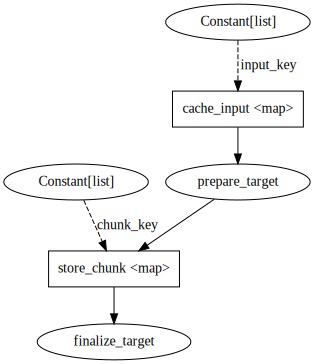

In [54]:
flow.visualize()

In [55]:
ds = xr.open_zarr(recipe.target_mapper)
ds

<xarray.Dataset>
Dimensions:             (time: 12, nbounds: 2, depth: 57, lat: 180, lon: 360)
Coordinates:
    climatology_bounds  (time, nbounds) float32 dask.array<chunksize=(1, 2), meta=np.ndarray>
    crs                 int32 ...
  * depth               (depth) float32 0.0 5.0 10.0 ... 1.45e+03 1.5e+03
    depth_bnds          (depth, nbounds) float32 dask.array<chunksize=(57, 2), meta=np.ndarray>
  * lat                 (lat) float32 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
    lat_bnds            (lat, nbounds) float32 dask.array<chunksize=(180, 2), meta=np.ndarray>
  * lon                 (lon) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
    lon_bnds            (lon, nbounds) float32 dask.array<chunksize=(360, 2), meta=np.ndarray>
  * time                (time) object 1958-01-16 00:00:00 ... 1958-12-16 00:0...
Dimensions without coordinates: nbounds
Data variables: (12/16)
    o_an                (time, depth, lat, lon) float32 dask.array<chunksize=(1, 57, 180, 360), meta=np.ndarray>
    o_dd                (time, depth, lat, lon) float64 dask.array<chunksize=(1, 57, 180, 360), meta=np.ndarray>
    o_gp                (time, depth, lat, lon) float64 dask.array<chunksize=(1, 57, 180, 360), meta=np.ndarray>
    o_ma                (time, depth, lat, lon) float32 dask.array<chunksize=(1, 57, 180, 360), meta=np.ndarray>
    o_mn                (time, depth, lat, lon) float32 dask.array<chunksize=(1, 57, 180, 360), meta=np.ndarray>
    o_oa                (time, depth, lat, lon) float32 dask.array<chunksize=(1, 57, 180, 360), meta=np.ndarray>
    ...                  ...
    t_gp                (time, depth, lat, lon) float64 dask.array<chunksize=(1, 57, 180, 360), meta=np.ndarray>
    t_ma                (time, depth, lat, lon) float32 dask.array<chunksize=(1, 57, 180, 360), meta=np.ndarray>
    t_mn                (time, depth, lat, lon) float32 dask.array<chunksize=(1, 57, 180, 360), meta=np.ndarray>
    t_oa                (time, depth, lat, lon) float32 dask.array<chunksize=(1, 57, 180, 360), meta=np.ndarray>
    t_sd                (time, depth, lat, lon) float32 dask.array<chunksize=(1, 57, 180, 360), meta=np.ndarray>
    t_se                (time, depth, lat, lon) float32 dask.array<chunksize=(1, 57, 180, 360), meta=np.ndarray>
Attributes: (12/49)
    Conventions:                     CF-1.6, ACDD-1.3
    cdm_data_type:                   Grid
    comment:                         global climatology as part of the World ...
    contributor_name:                Ocean Climate Laboratory
    contributor_role:                Calculation of climatologies
    creator_email:                   NCEI.info@noaa.gov
    ...                              ...
    summary:                         Climatological mean dissolved oxygen for...
    time_coverage_duration:          P!!Y
    time_coverage_end:               2017-01-31
    time_coverage_resolution:        P01M
    time_coverage_start:             1900-01-01
    title:                           World Ocean Atlas 2018 : mole_concentrat...

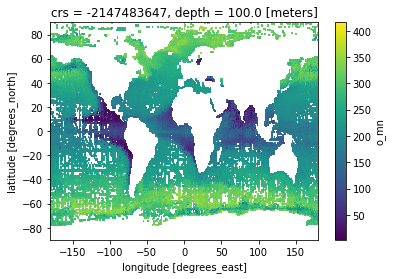

In [58]:
ds.o_mn.isel(depth=20).mean(dim='time').plot()


In [59]:
ds.nbytes/1e9

3.54586336